In [71]:
import math
import pandas as pd
import Levenshtein
from scipy import stats
from sys import getsizeof
from csv import DictReader
from itertools import zip_longest
from matplotlib import pyplot as plt

In [72]:
odd = [x for x in range(100000) if x % 2 != 0]

In [73]:
getsizeof(odd)

406496

In [74]:
odd1 = (x for x in range(100000) if x % 2 != 0)

In [75]:
getsizeof(odd1)

120

In [76]:
countries = ["India", "USA", "France", "UK", "Brasil", "Japan"]
capitals = ["Delhi", "Washington", "Paris", "London"]

In [77]:
cc = zip(countries, capitals)
cc

In [78]:
dict(cc)

{'India': 'Delhi', 'USA': 'Washington', 'France': 'Paris', 'UK': 'London'}

In [79]:
countries = ["India", "USA", "France", "UK", "Brasil", "Japan"]
capitals = ["Delhi", "Washington", "Paris", "London"]
cc = zip_longest(countries, capitals)
cc

In [80]:
dict(cc)

{'India': 'Delhi',
 'USA': 'Washington',
 'France': 'Paris',
 'UK': 'London',
 'Brasil': None,
 'Japan': None}

In [81]:
rawData = []

with open('../../Lesson06/Exercise73-77/combinded_data.csv', 'rt') as fd:
    file = DictReader(fd)
    for data in file:
        rawData.append(dict(data))

In [82]:
rawData

[{'Name': 'Bob',
  'Age': '23.0',
  'Height': '1.7',
  'Weight': '70',
  'Disease_history': 'N',
  'Heart_problem': 'N'},
 {'Name': 'Alex',
  'Age': '45',
  'Height': '1.61',
  'Weight': '61',
  'Disease_history': 'Y',
  'Heart_problem': 'N'},
 {'Name': 'George',
  'Age': '12.5',
  'Height': '1.4',
  'Weight': '40',
  'Disease_history': 'N',
  'Heart_problem': ''},
 {'Name': 'Alice',
  'Age': '34',
  'Height': '1.56',
  'Weight': '51',
  'Disease_history': 'N',
  'Heart_problem': 'Y'}]

In [83]:
for data in rawData:
    report_str = """%s is %s years old and is %s meter tall weighing about%s kg.
    \nHas a history of family illness: %s.\nPresently suffering from a heart disease: %s""" \
                 % (data["Name"], data["Age"], data["Height"], data["Weight"],
    data["Disease_history"], data["Heart_problem"])
    print(report_str)

Bob is 23.0 years old and is 1.7 meter tall weighing about70 kg.
    
Has a history of family illness: N.
Presently suffering from a heart disease: N
Alex is 45 years old and is 1.61 meter tall weighing about61 kg.
    
Has a history of family illness: Y.
Presently suffering from a heart disease: N
George is 12.5 years old and is 1.4 meter tall weighing about40 kg.
    
Has a history of family illness: N.
Presently suffering from a heart disease: 
Alice is 34 years old and is 1.56 meter tall weighing about51 kg.
    
Has a history of family illness: N.
Presently suffering from a heart disease: Y


In [84]:
for data in rawData:
    report_str = """{} is {} years old and is {} meter tall weighing about{} kg.\n
    Has a history of family illness: {}.\n Presently suffering from a heart disease: {}""".format(data["Name"], data["Age"], data["Height"],
                                                                                                   data["Weight"], data["Disease_history"], data["Heart_problem"])
    print(report_str)

Bob is 23.0 years old and is 1.7 meter tall weighing about70 kg.

    Has a history of family illness: N.
 Presently suffering from a heart disease: N
Alex is 45 years old and is 1.61 meter tall weighing about61 kg.

    Has a history of family illness: Y.
 Presently suffering from a heart disease: N
George is 12.5 years old and is 1.4 meter tall weighing about40 kg.

    Has a history of family illness: N.
 Presently suffering from a heart disease: 
Alice is 34 years old and is 1.56 meter tall weighing about51 kg.

    Has a history of family illness: N.
 Presently suffering from a heart disease: Y


In [85]:
for data in rawData:
    report_str = """{Name} is {Age} years old and is {Height} meter tall weighing about{Weight} kg.\nHas a history of family illness: {Disease_history}.\nPresently suffering from a heart disease: {Heart_problem}\n""".format(**data)
    print(report_str)

Bob is 23.0 years old and is 1.7 meter tall weighing about70 kg.
Has a history of family illness: N.
Presently suffering from a heart disease: N

Alex is 45 years old and is 1.61 meter tall weighing about61 kg.
Has a history of family illness: Y.
Presently suffering from a heart disease: N

George is 12.5 years old and is 1.4 meter tall weighing about40 kg.
Has a history of family illness: N.
Presently suffering from a heart disease: 

Alice is 34 years old and is 1.56 meter tall weighing about51 kg.
Has a history of family illness: N.
Presently suffering from a heart disease: Y



In [86]:
df0 = [math.cos(i*(math.pi/4)) for i in range(50)]
df0

[1.0,
 0.7071067811865476,
 6.123233995736766e-17,
 -0.7071067811865475,
 -1.0,
 -0.7071067811865477,
 -1.8369701987210297e-16,
 0.7071067811865474,
 1.0,
 0.7071067811865477,
 3.061616997868383e-16,
 -0.7071067811865467,
 -1.0,
 -0.7071067811865471,
 -4.286263797015736e-16,
 0.7071067811865466,
 1.0,
 0.7071067811865472,
 5.51091059616309e-16,
 -0.7071067811865465,
 -1.0,
 -0.7071067811865474,
 -2.4499125789312946e-15,
 0.7071067811865464,
 1.0,
 0.7071067811865475,
 -9.803364199544708e-16,
 -0.7071067811865464,
 -1.0,
 -0.7071067811865476,
 -2.6948419387607653e-15,
 0.7071067811865462,
 1.0,
 0.7071067811865476,
 -7.354070601250002e-16,
 -0.7071067811865461,
 -1.0,
 -0.7071067811865477,
 -2.939771298590236e-15,
 0.707106781186546,
 1.0,
 0.7071067811865503,
 -4.904777002955296e-16,
 -0.7071067811865459,
 -1.0,
 -0.7071067811865479,
 -3.1847006584197066e-15,
 0.7071067811865483,
 1.0,
 0.7071067811865505]

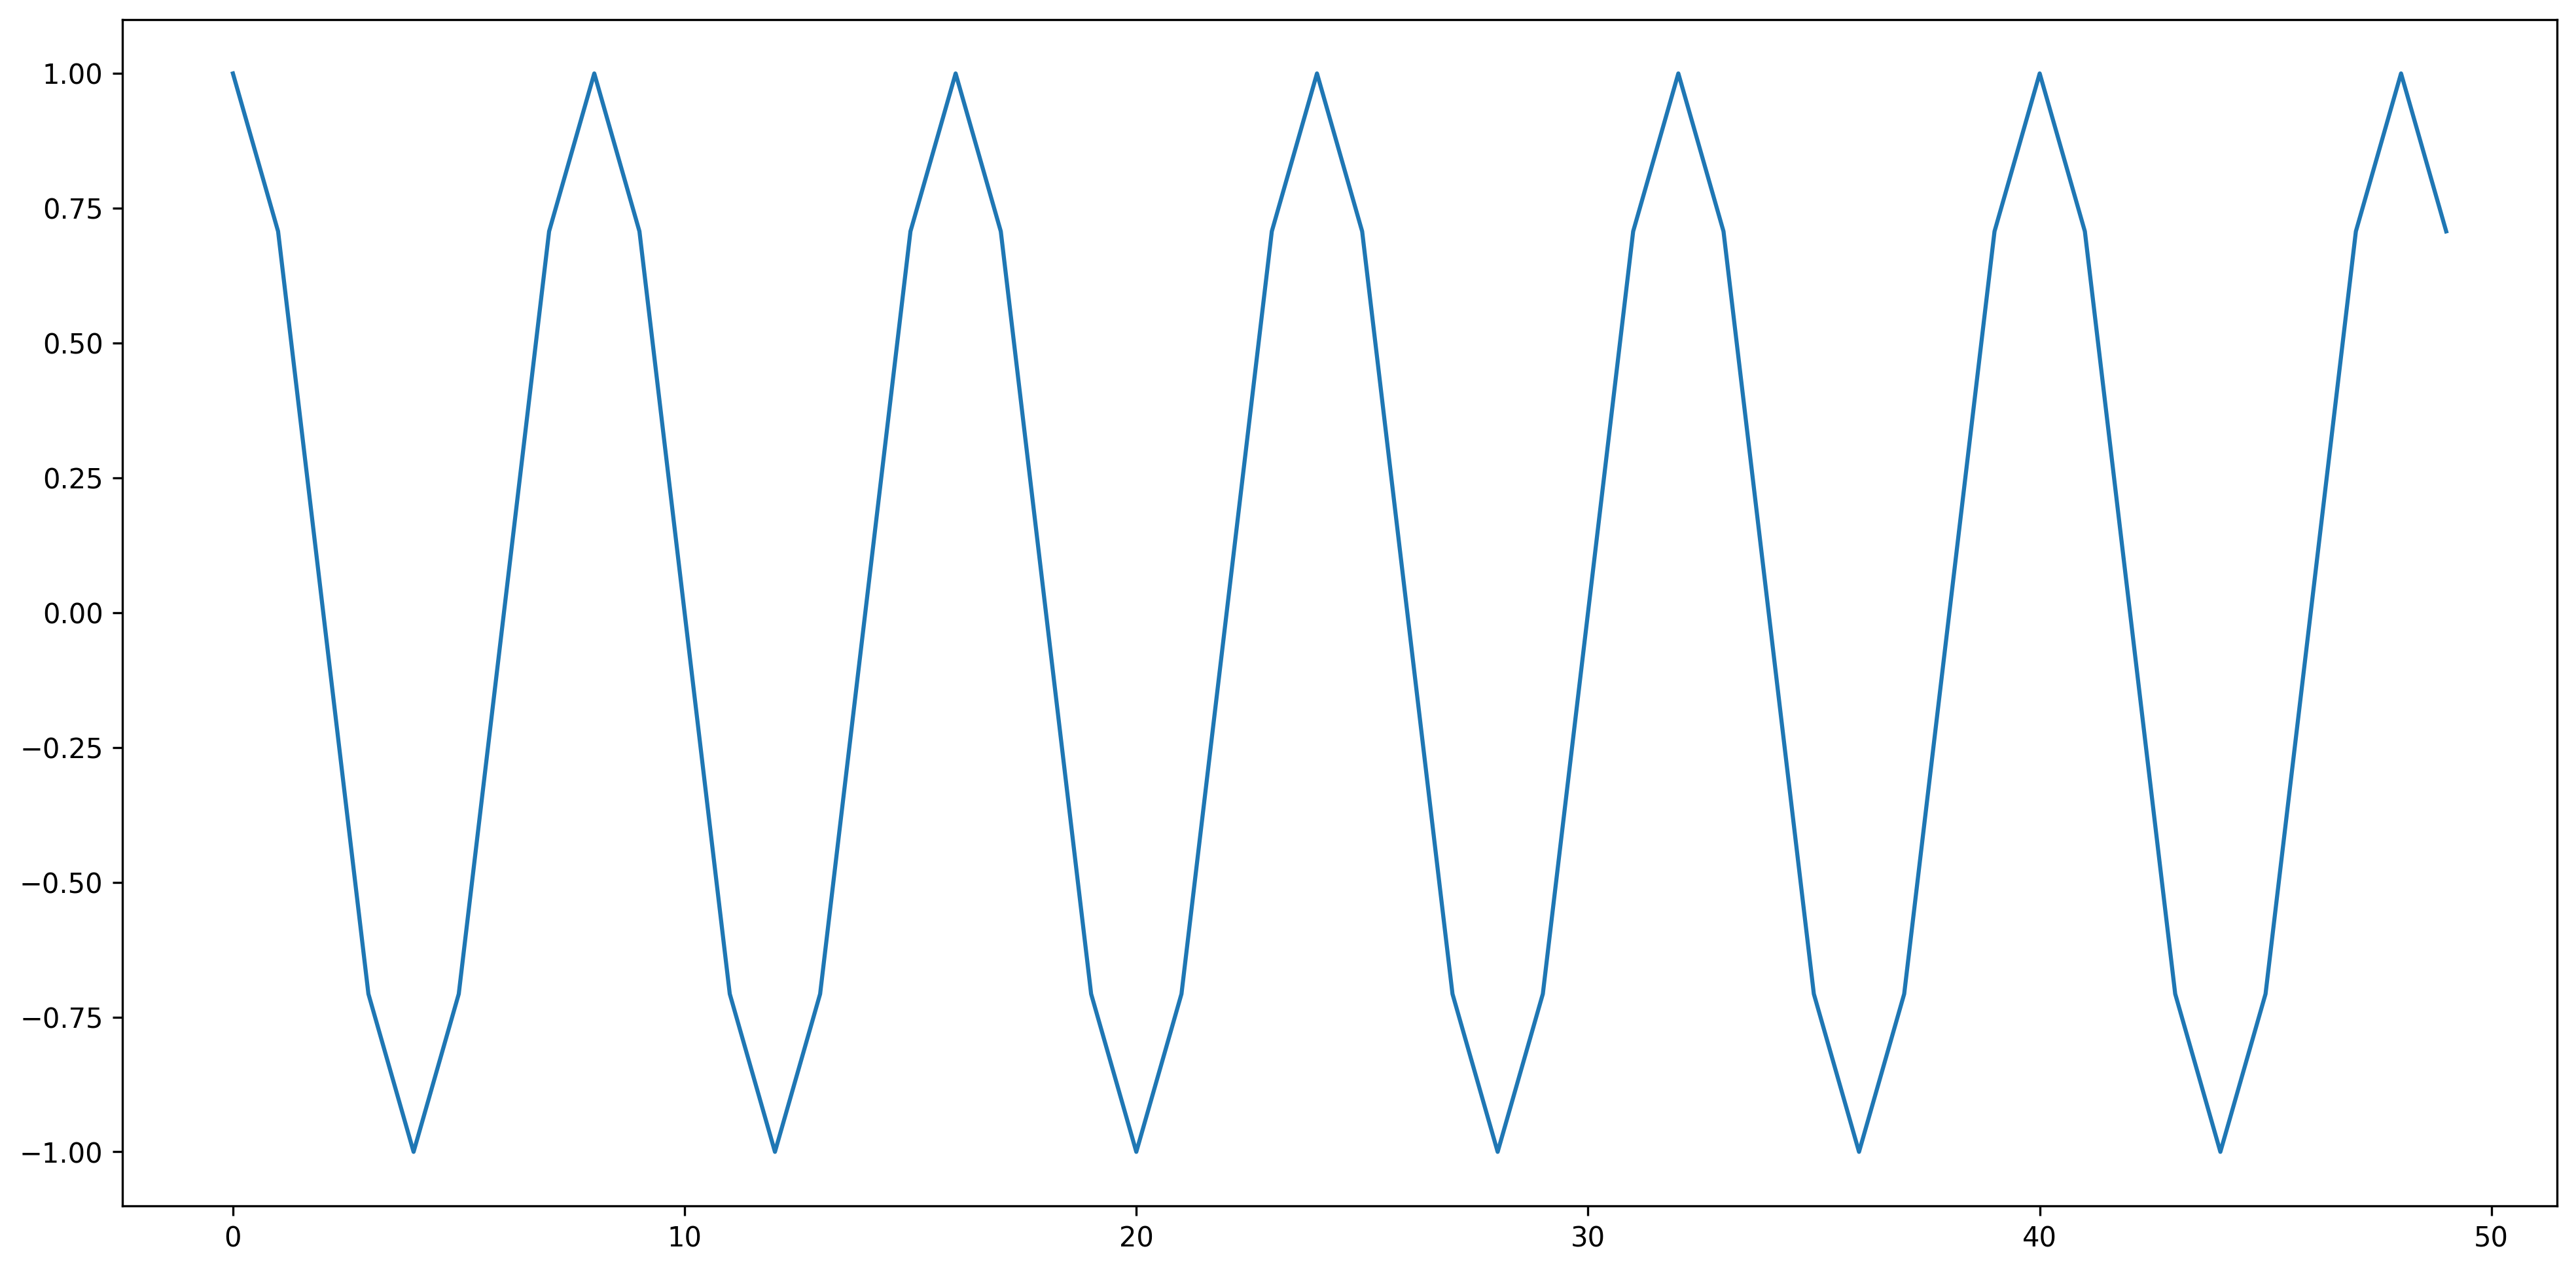

In [87]:
plt.figure(figsize=[16,8], dpi=300)
plt.plot(df0)
plt.show()

In [88]:
df1 = [math.cos(i*(math.pi/4)) for i in range(50)]
df1[6] = df1[6] + 8.0
df1[32] = df1[32] + 4.0

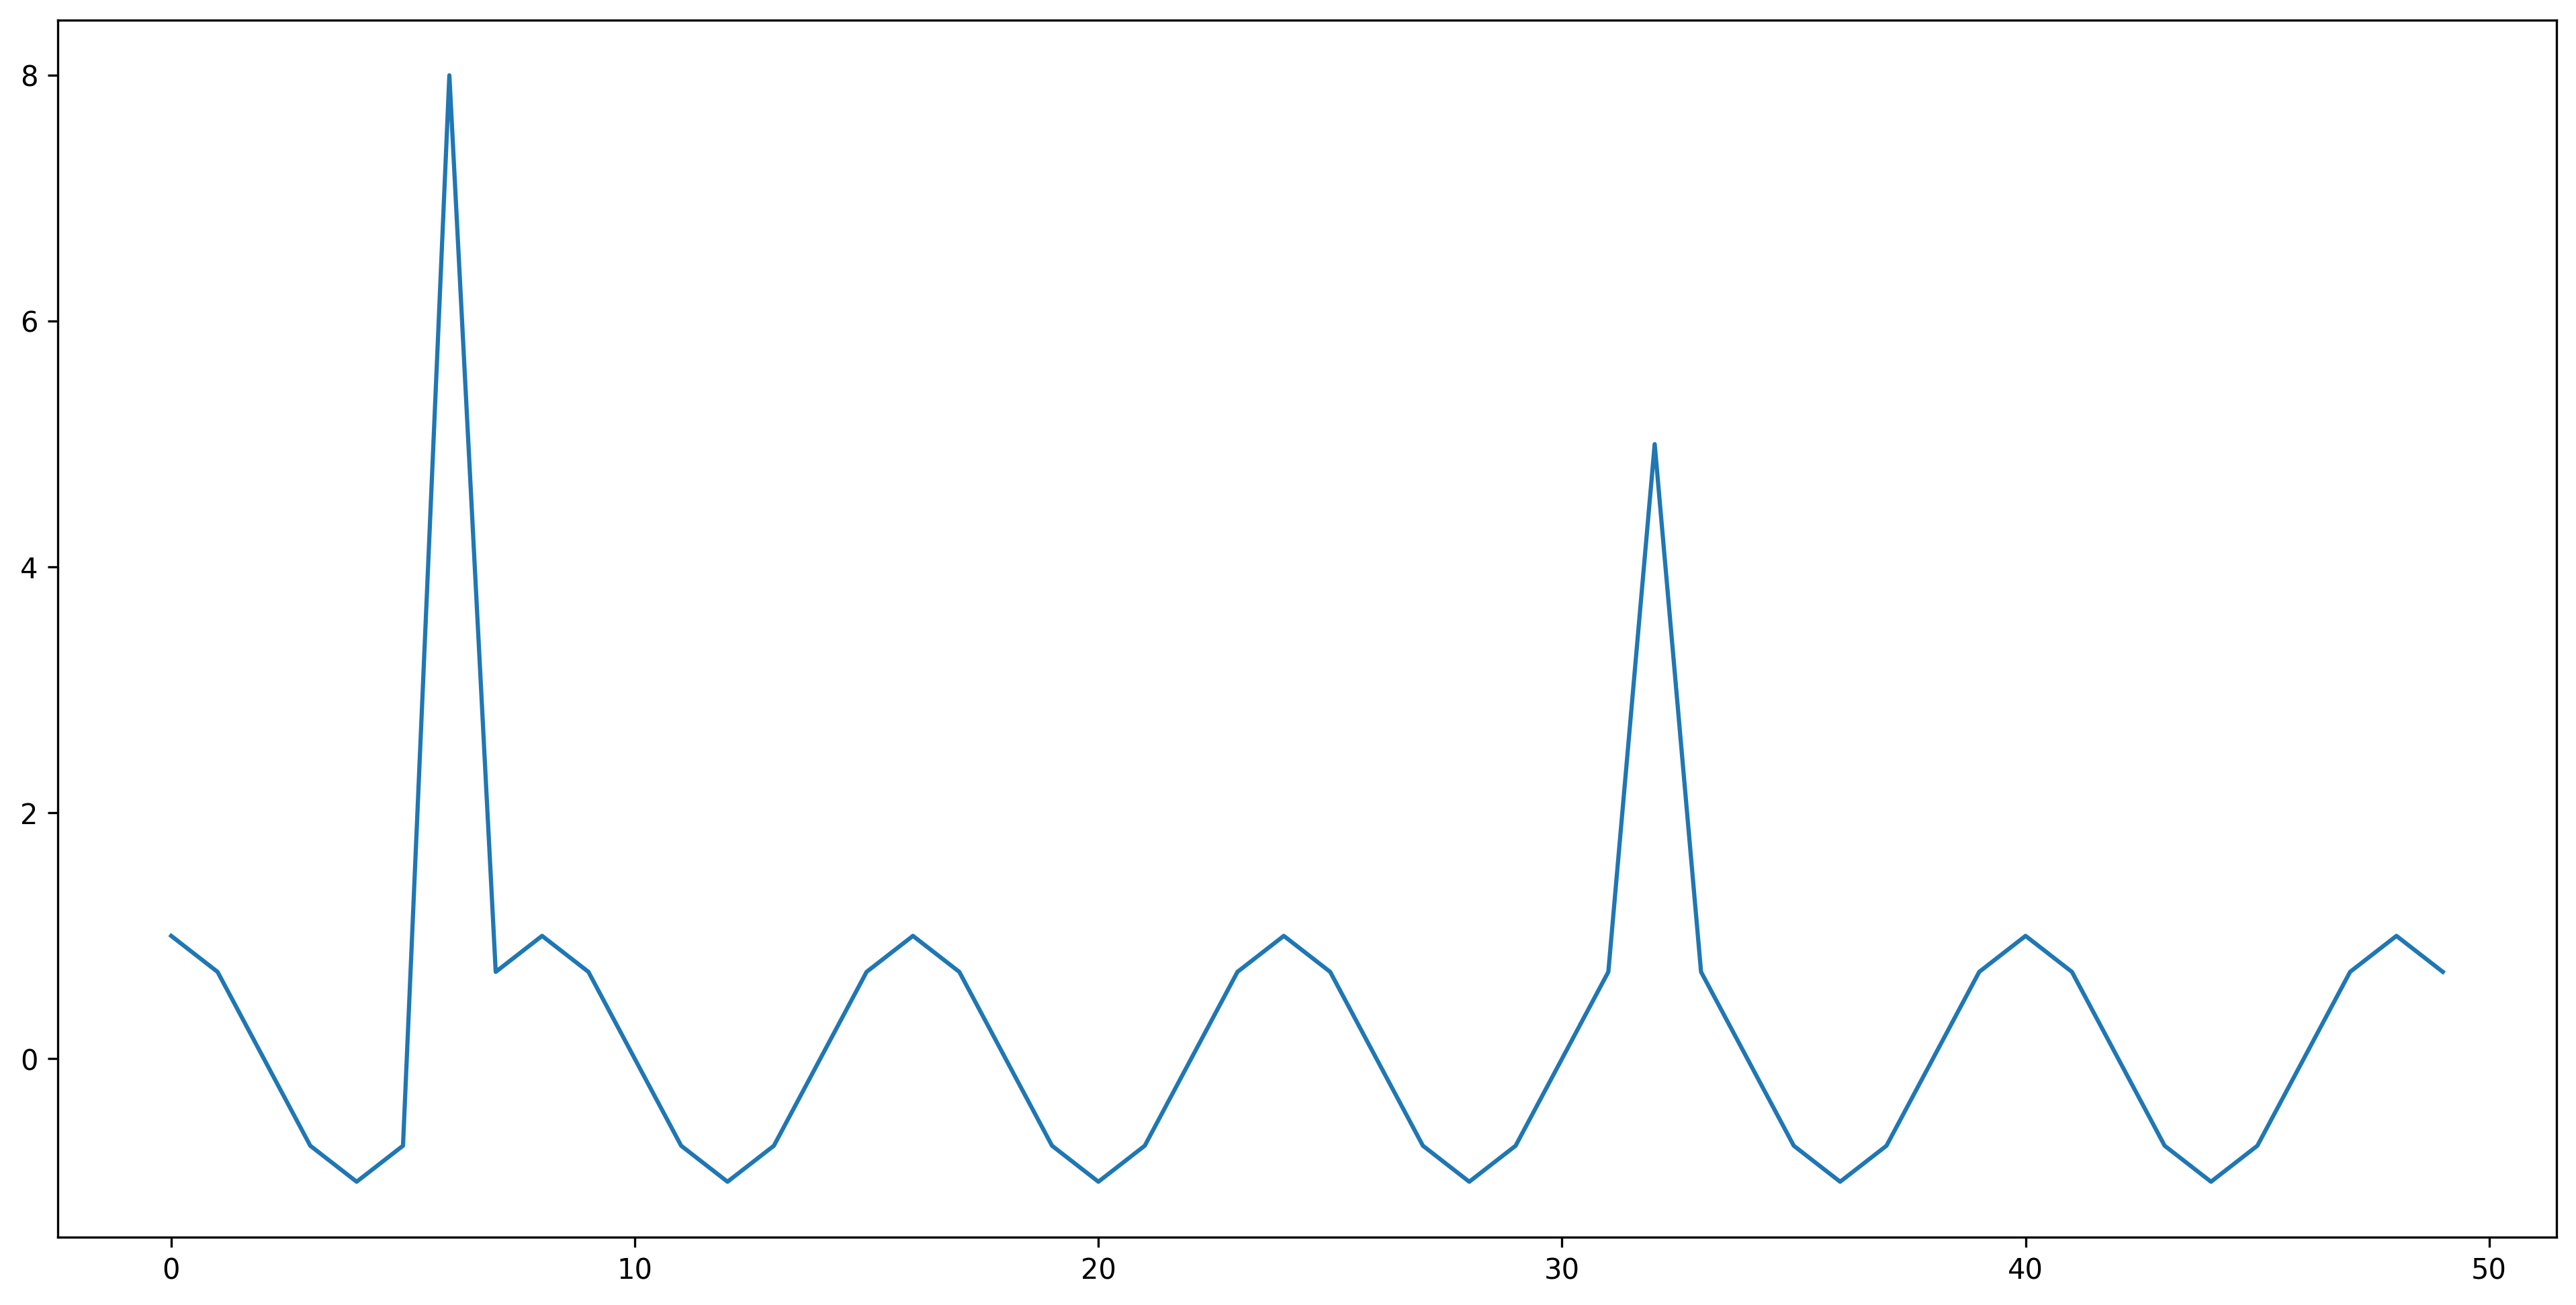

In [89]:
plt.figure(figsize=[16,8], dpi=300)
plt.plot(df1)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d194929dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d194670908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d194929eb8>,
 'medians': [<matplotlib.lines.Line2D at 0x1d194670c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d194b57780>,
 'means': []}

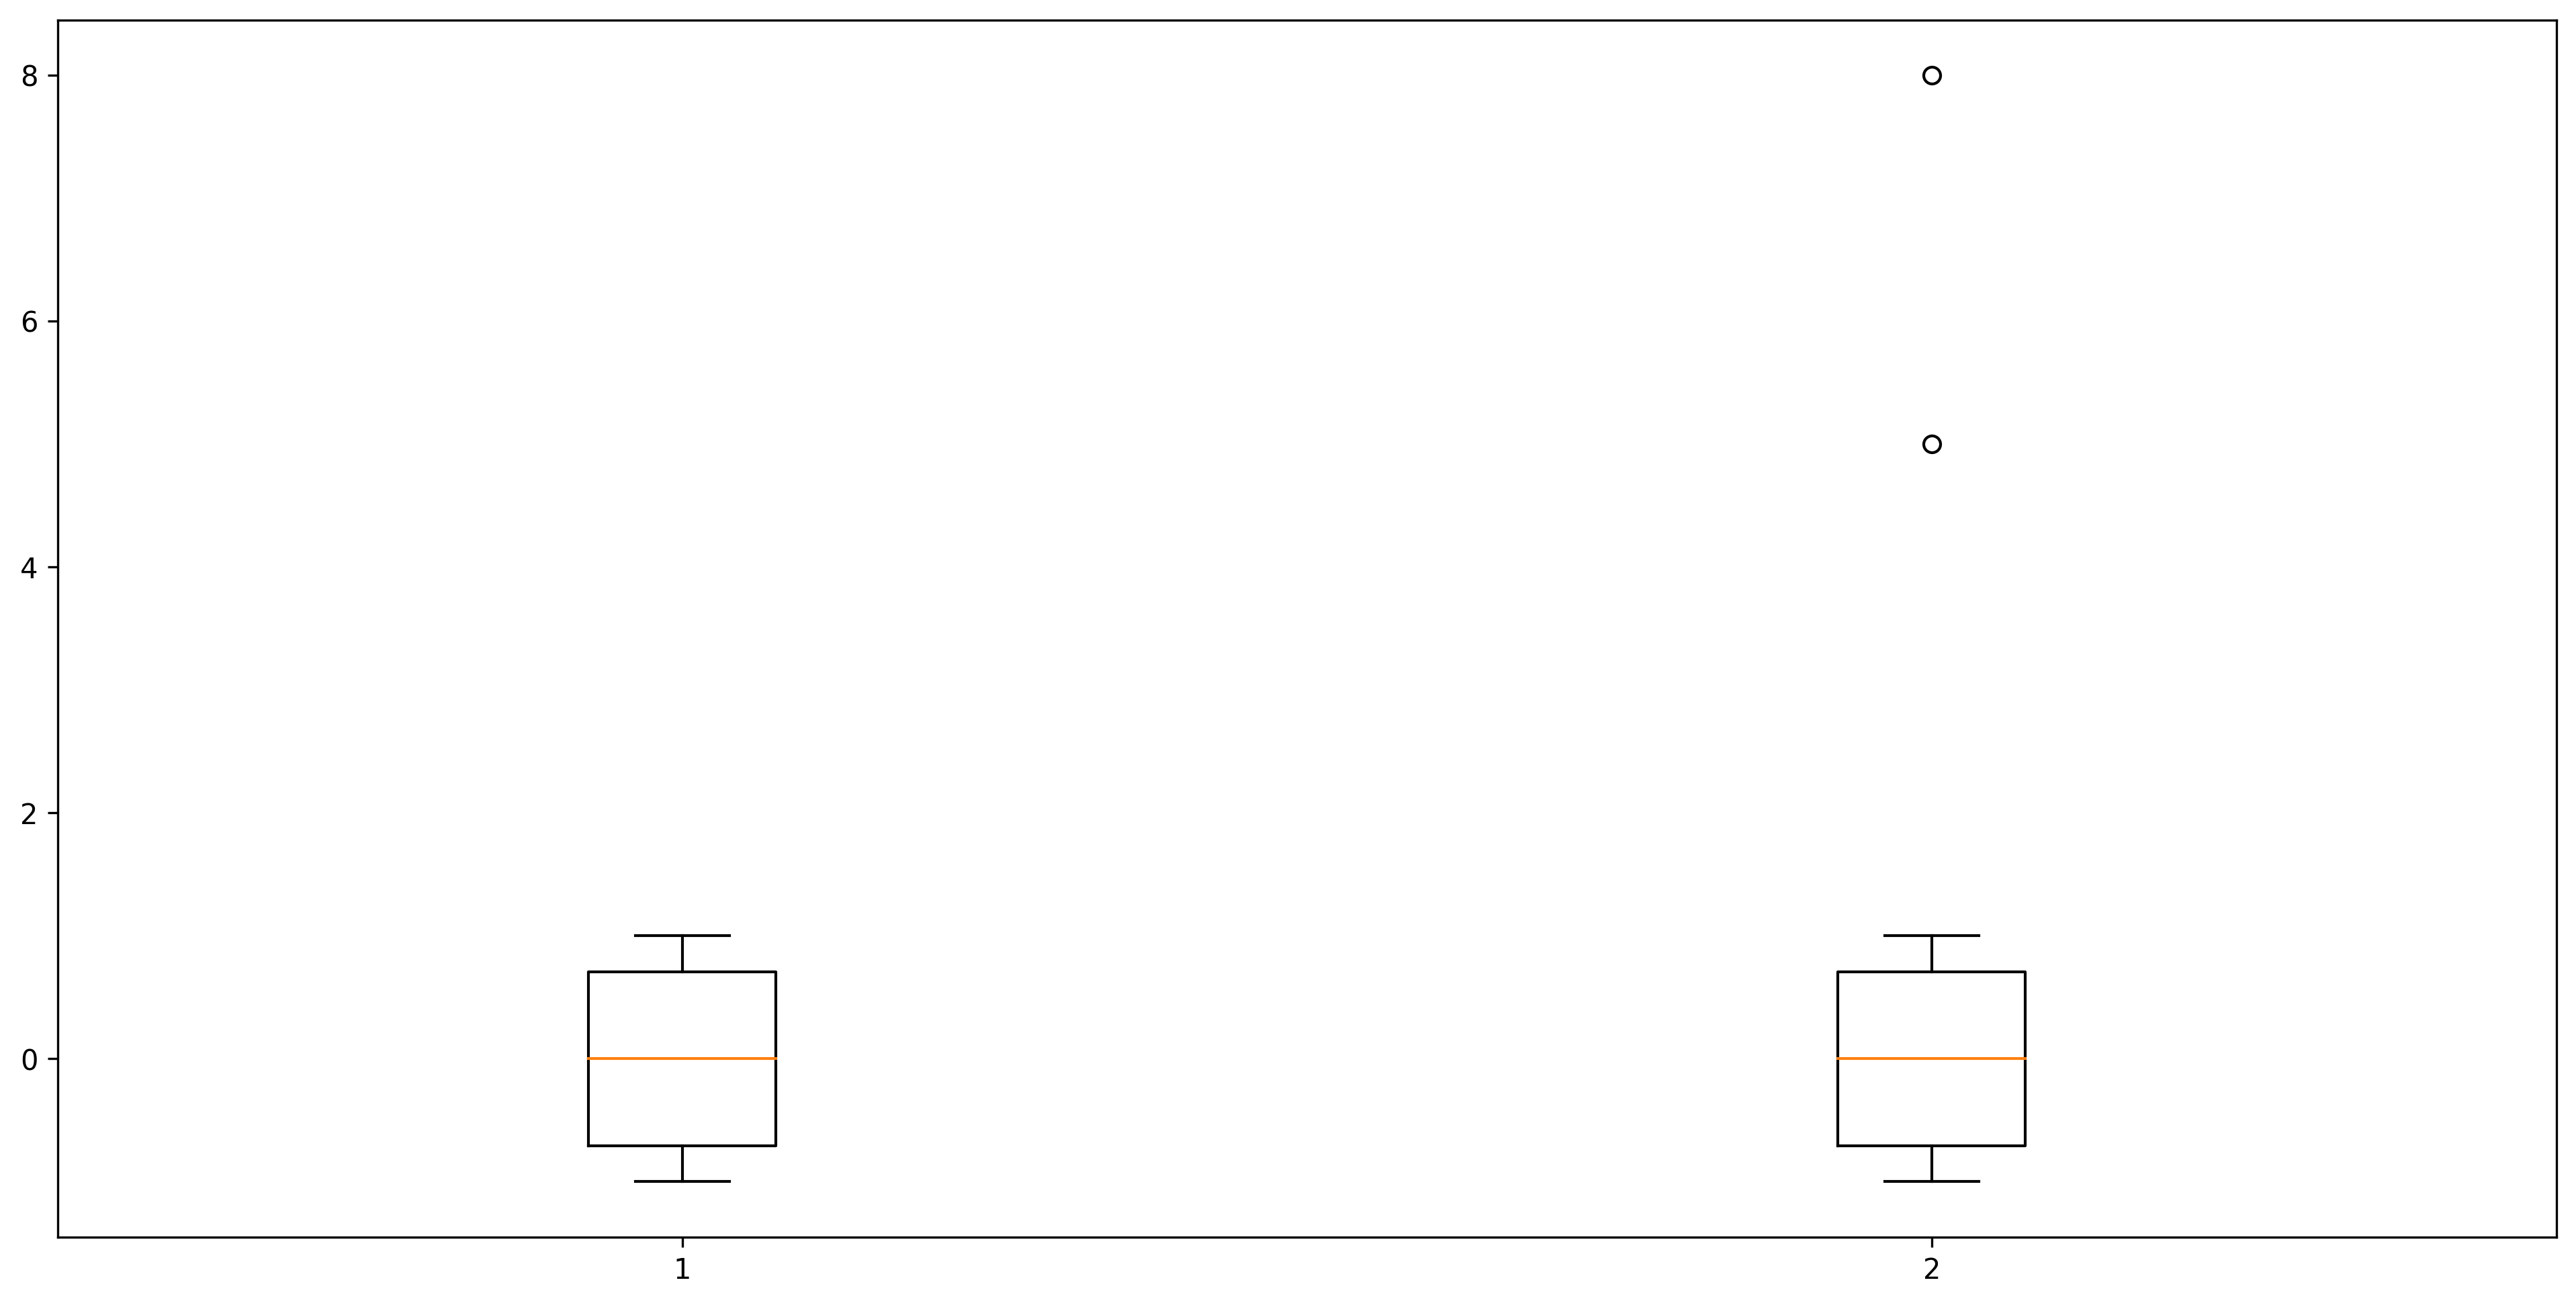

In [90]:
plt.figure(figsize=[16,8], dpi=300)
plt.boxplot([df0, df1])

In [91]:
z_score_df0 = stats.zscore(df0)
z_score_df1 = stats.zscore(df1)

In [92]:
z_score_df0

array([ 1.35401983,  0.94341777, -0.04786328, -1.03914434, -1.4497464 ,
       -1.03914434, -0.04786328,  0.94341777,  1.35401983,  0.94341777,
       -0.04786328, -1.03914434, -1.4497464 , -1.03914434, -0.04786328,
        0.94341777,  1.35401983,  0.94341777, -0.04786328, -1.03914434,
       -1.4497464 , -1.03914434, -0.04786328,  0.94341777,  1.35401983,
        0.94341777, -0.04786328, -1.03914434, -1.4497464 , -1.03914434,
       -0.04786328,  0.94341777,  1.35401983,  0.94341777, -0.04786328,
       -1.03914434, -1.4497464 , -1.03914434, -0.04786328,  0.94341777,
        1.35401983,  0.94341777, -0.04786328, -1.03914434, -1.4497464 ,
       -1.03914434, -0.04786328,  0.94341777,  1.35401983,  0.94341777])

In [93]:
z_score_df1

array([ 0.48994751,  0.29224723, -0.18504347, -0.66233416, -0.86003444,
       -0.66233416,  5.21488431,  0.29224723,  0.48994751,  0.29224723,
       -0.18504347, -0.66233416, -0.86003444, -0.66233416, -0.18504347,
        0.29224723,  0.48994751,  0.29224723, -0.18504347, -0.66233416,
       -0.86003444, -0.66233416, -0.18504347,  0.29224723,  0.48994751,
        0.29224723, -0.18504347, -0.66233416, -0.86003444, -0.66233416,
       -0.18504347,  0.29224723,  3.18991139,  0.29224723, -0.18504347,
       -0.66233416, -0.86003444, -0.66233416, -0.18504347,  0.29224723,
        0.48994751,  0.29224723, -0.18504347, -0.66233416, -0.86003444,
       -0.66233416, -0.18504347,  0.29224723,  0.48994751,  0.29224723])

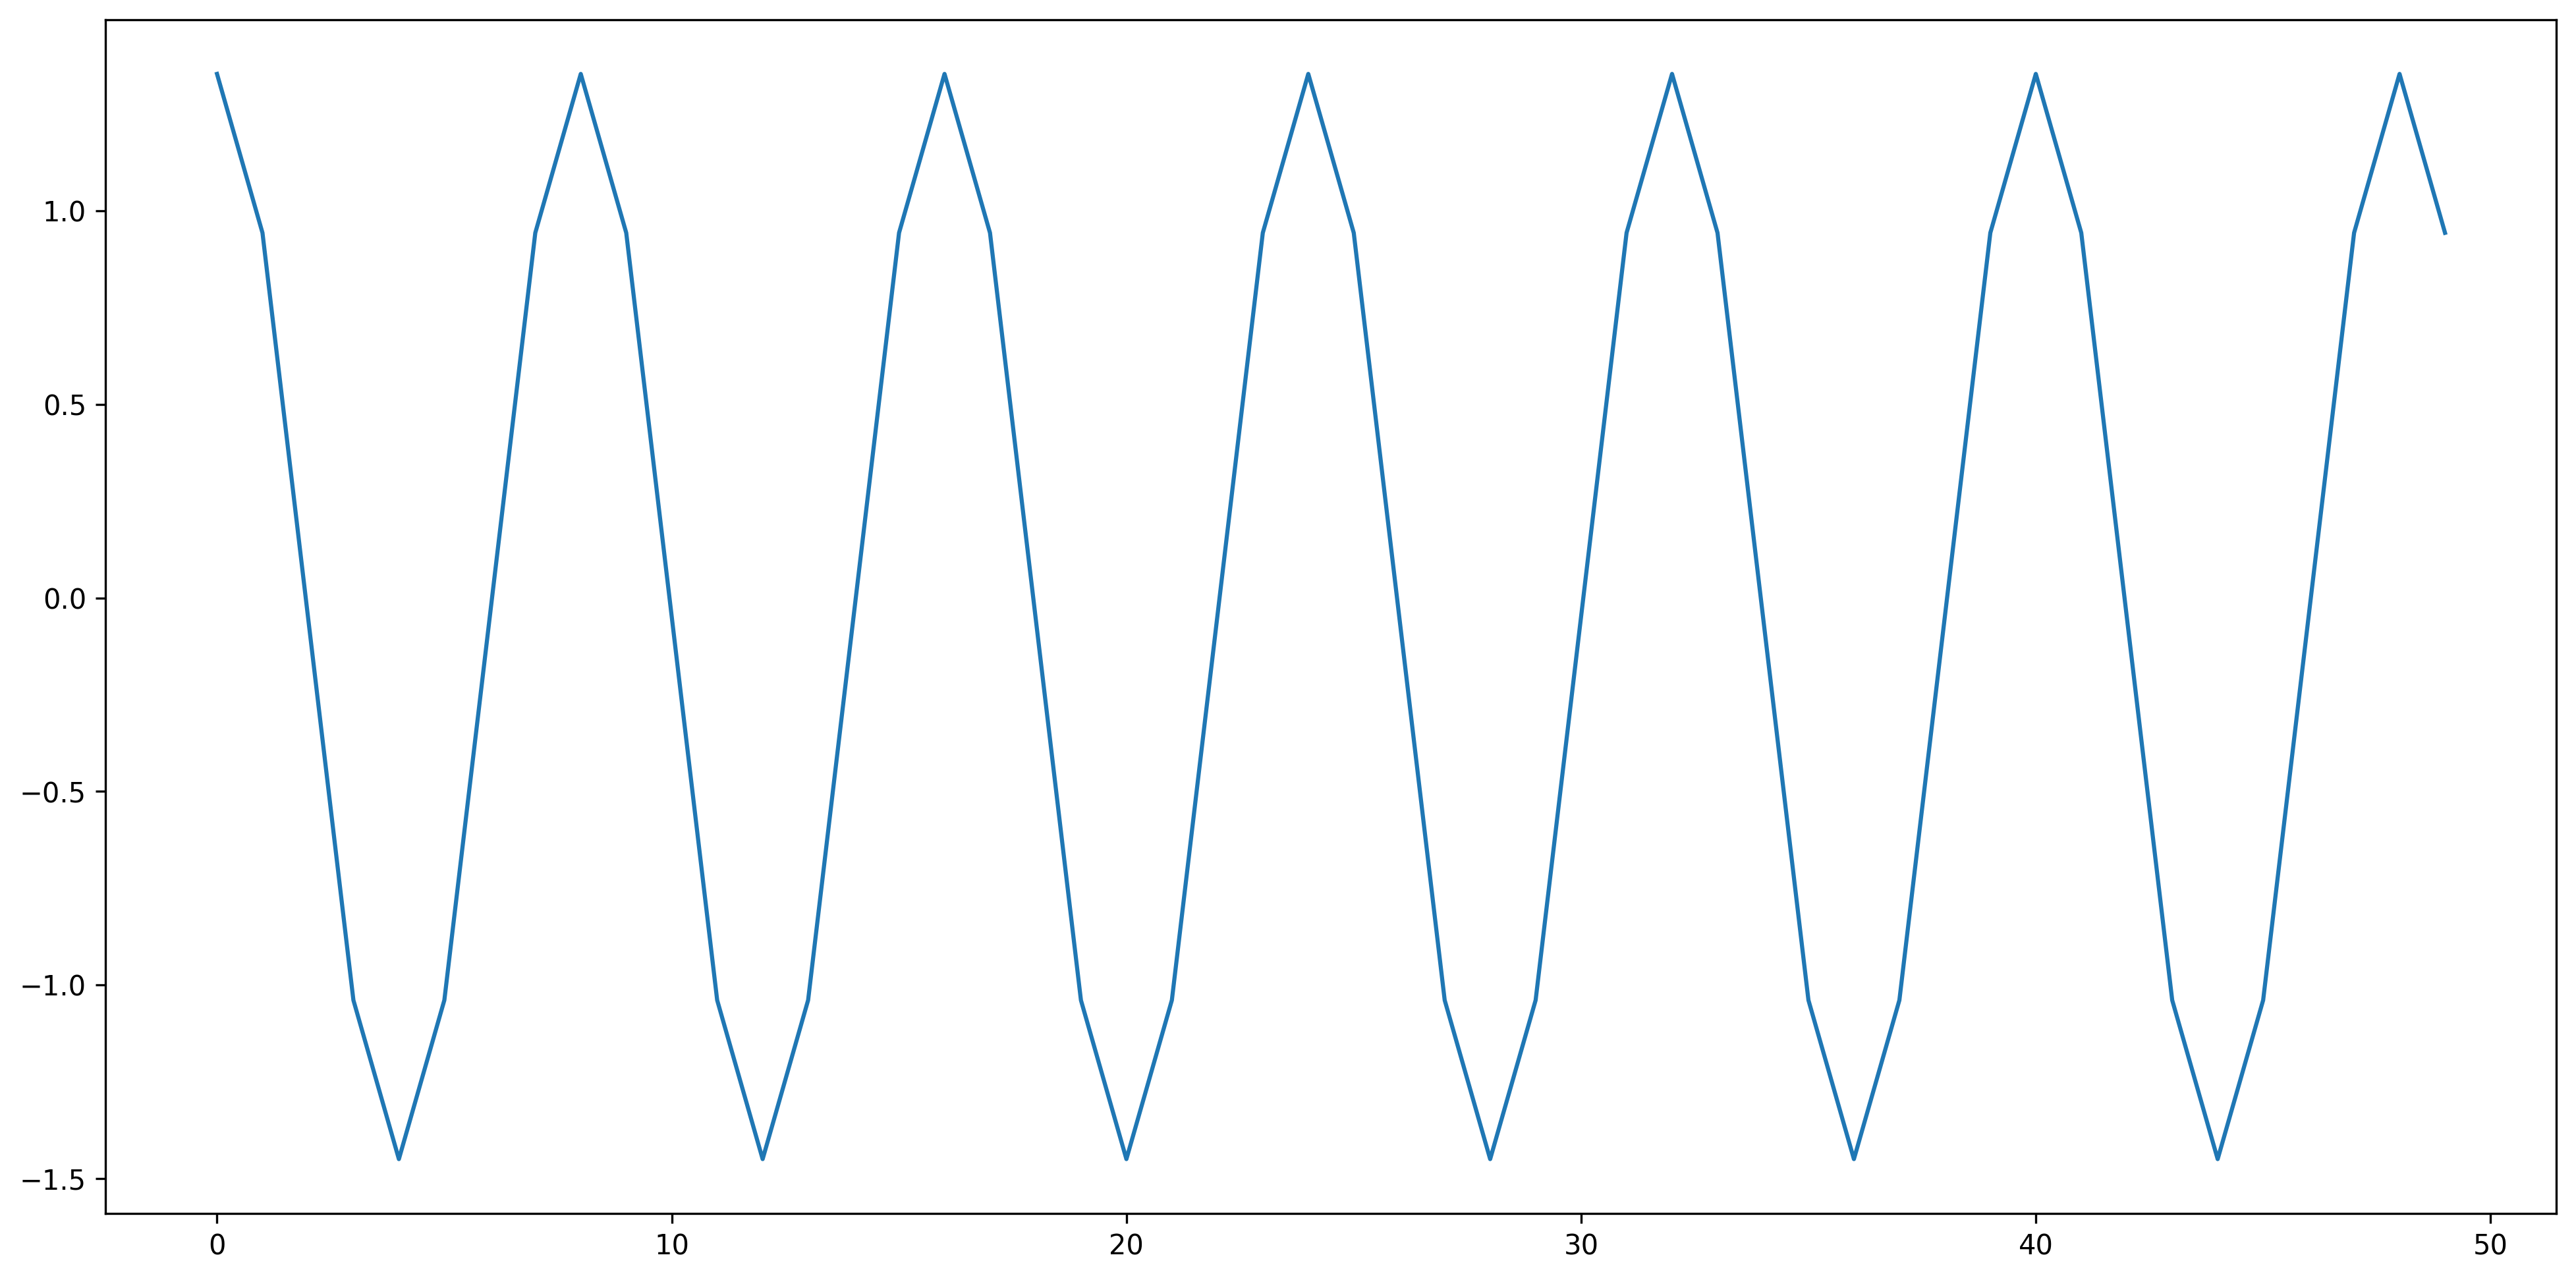

In [94]:
plt.figure(figsize=[16, 8], dpi=300)
plt.plot(z_score_df0)
plt.show()

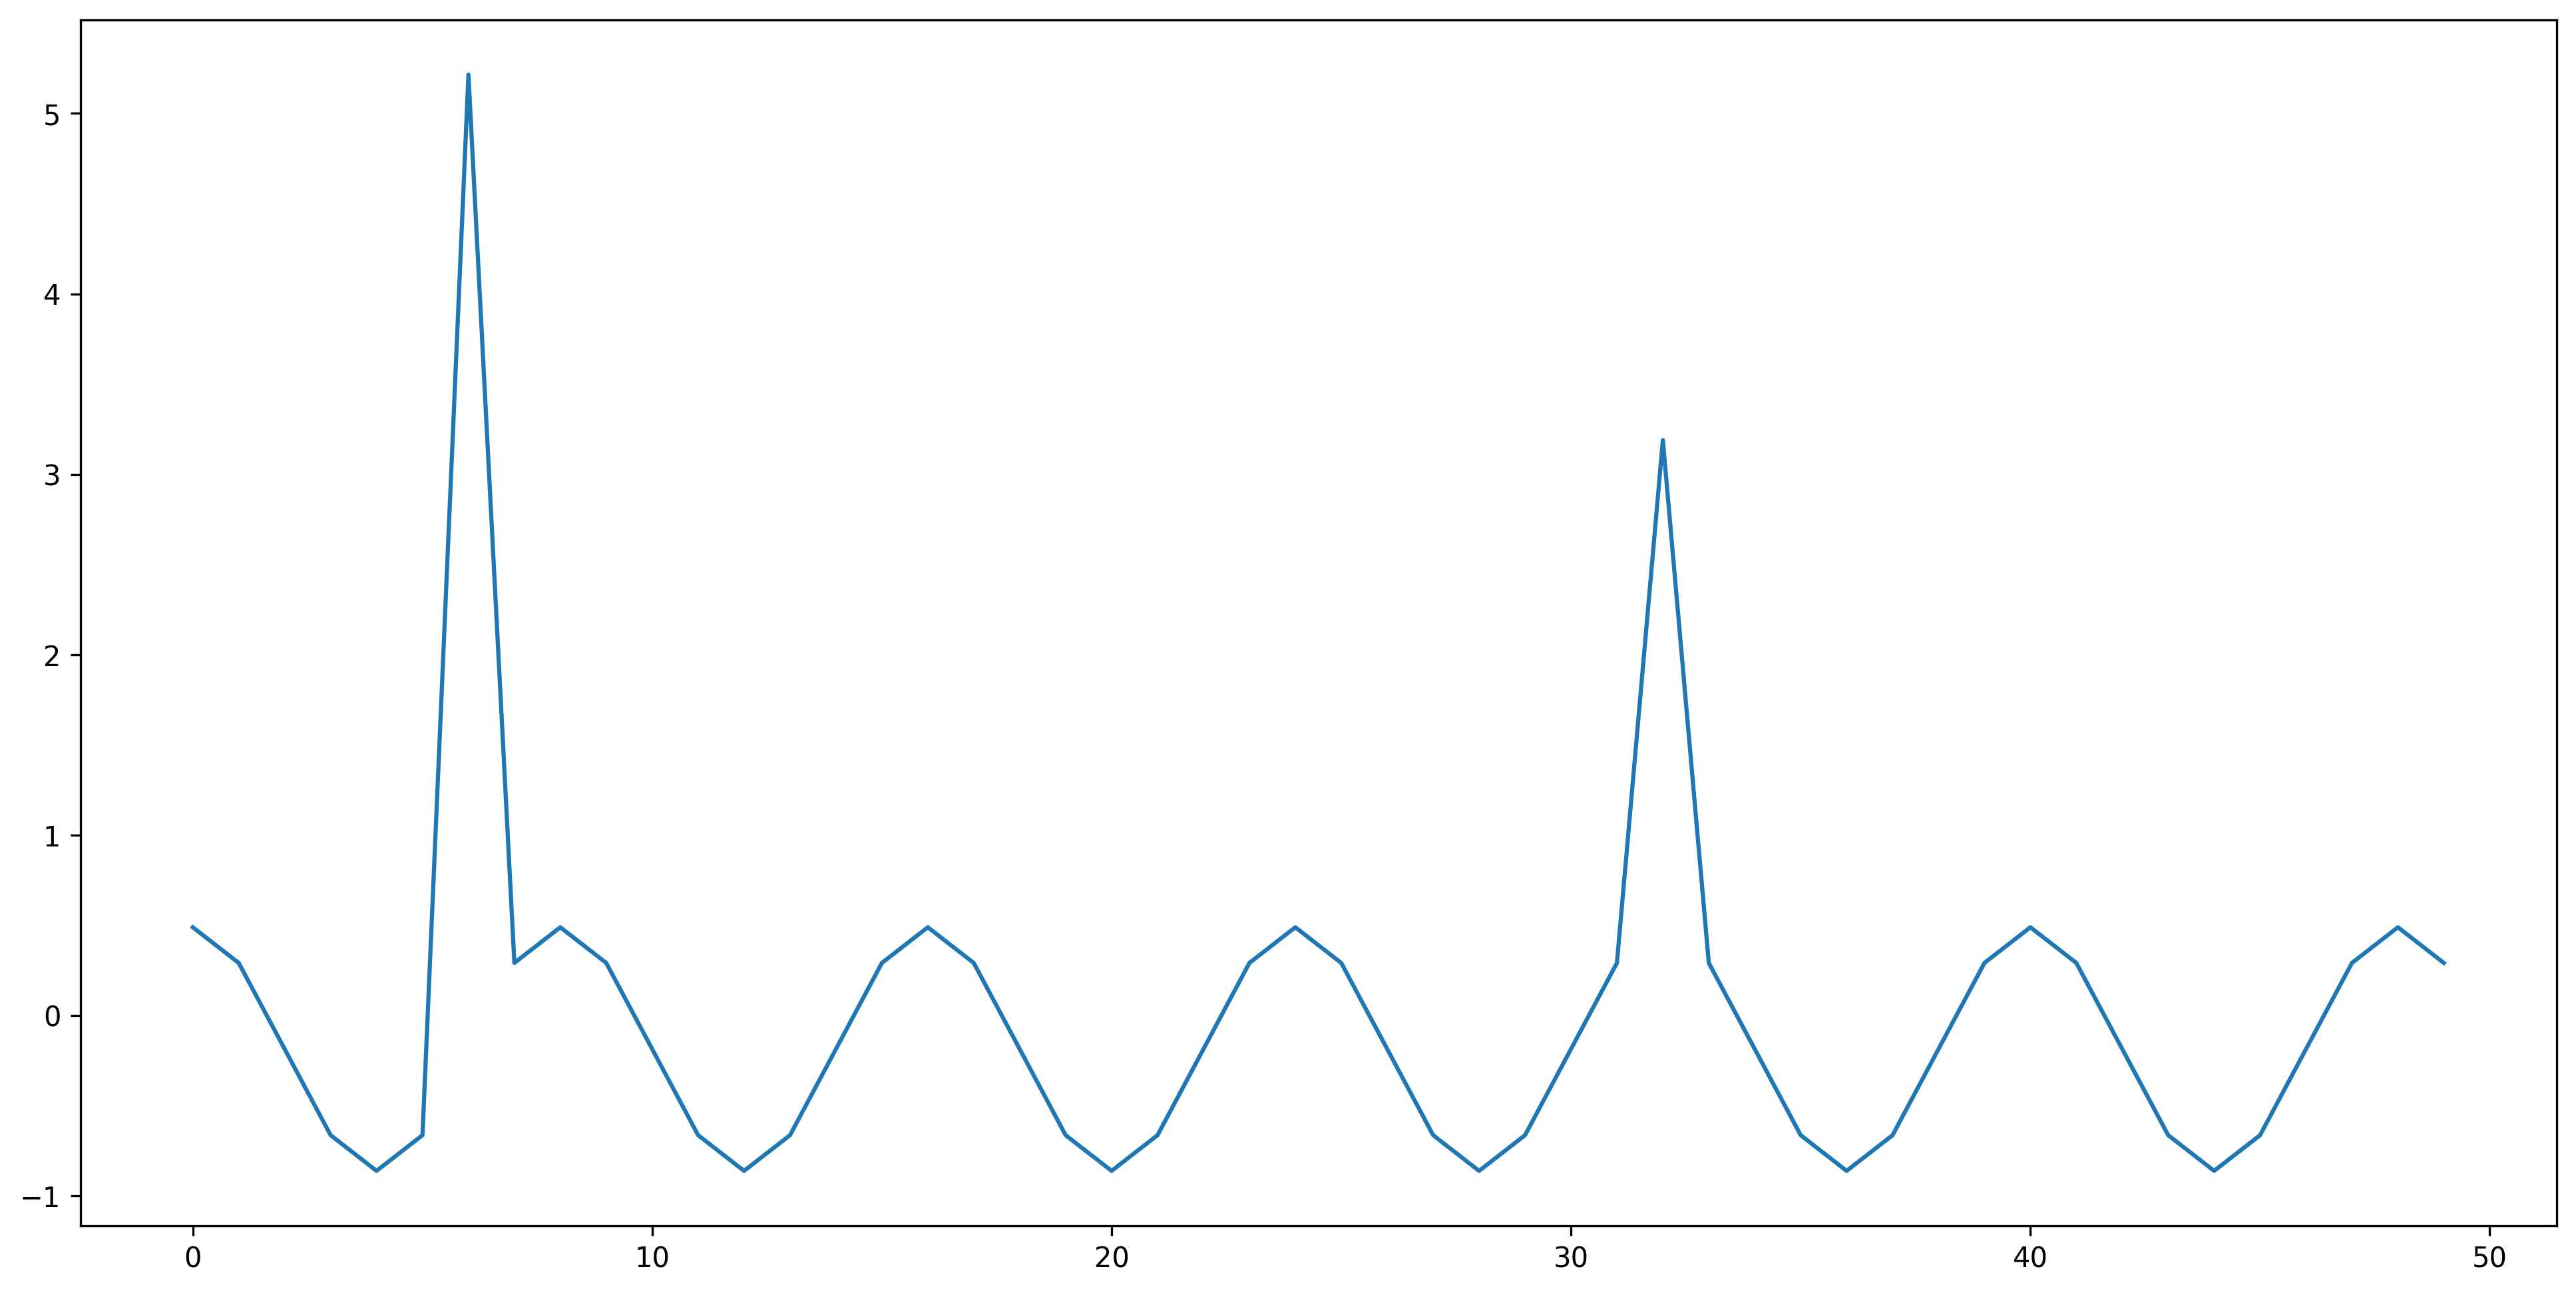

In [95]:
plt.figure(figsize=[16, 8], dpi=300)
plt.plot(z_score_df1)
plt.show()

In [96]:
z_score_df0 = pd.DataFrame(z_score_df0)
z_score_df1 = pd.DataFrame(z_score_df1)

In [97]:
z_score_df0

,0
0,1.354020
1,0.943418
2,-0.047863
3,-1.039144
4,-1.449746
5,-1.039144
6,-0.047863
7,0.943418
8,1.354020
9,0.943418


In [98]:
z_score_df1

,0
0,0.489948
1,0.292247
2,-0.185043
3,-0.662334
4,-0.860034
5,-0.662334
6,5.214884
7,0.292247
8,0.489948
9,0.292247


In [99]:
z_score_df0 = z_score_df0[(z_score_df0 < 3) & (z_score_df0 > -3)]
z_score_df0

,0
0,1.354020
1,0.943418
2,-0.047863
3,-1.039144
4,-1.449746
5,-1.039144
6,-0.047863
7,0.943418
8,1.354020
9,0.943418


In [104]:
z_score_df1 = z_score_df1[(z_score_df0 < 3)]